# Ch.5 시장 위험 모델링

(*) 다른 원인으로 발생하는 위험에 동일한 도구를 사용해 파악하는 것 -> 현명하지 않음 -> 재정적 위험의 원인을 구별하는 방법 알아야 함
(*) 다양한 금융 위험 원인을 달리 취급해야 함 ~ 다양한 위험 요소가 자산 가격에 크게 기여함
(*) Mainly, 시장 / 신용 / 유동성 / 운영

1. 시장 
- 환율, 금리, 물가 상승률 등 재무 지표의 변동으로 인해 발생하는 리스크
- 재무 지표: 어느 정도 상호 연관돼 있음 -> 위험 요인의 상호 작용 고려해야 함
- 시장 위험을 관리하는 the most popular instrument: 최대 예상 손실(VAR), 최대 손실 평균(ES)
<전통적 모델 or 머신러닝 기반 모델?>
- traditional이 해결할 수 없는?: 금융 시스템의 복잡도 ~ 일부 강력한 가정 or 단순히 데이터로 인한 복잡성 포착 불가
- ML: 잘 정립된 이론 없이도 변수 간의 연관성을 밝히고 주요 변수를 식별하며 변수가 종속변수에 미치는 영향을 알아낼 수 있게 해줌 ~ 발견 자체를 도와줌 rather than 이론
$\\$(i) 통계적 방법: 프로젝트별 확률 모델의 생성 + 적합화 통해 달성되는 추론에 초점을 맞춤
$\\$(ii) 머신러닝: 풍부하고 다루기 힘든 데이터에서 패턴을 찾기위해 범용 학습 알고리듬을 사용해 예측에 집중함

1. 최대 예상 손실 (VaR)
$\\$: 다양한 위치 & 위험 요소에 걸쳐 공통적으로 일관된 위험 측정을 제공함 & 서로 다른 위험 요소 간의 상관관계를 고려함
$\\$: 주어진 기간과 사전 정의된 신뢰구간 동안 회사에 대한 최악의 예상 손실을 측정하는 데 사용됨
$\\$Ex) 투자의 일 VaR이 95% 신뢰구간에서 100만 달러 = 하루에 100만 달러 이상의 손실을 입을 가능성이 5%
- 세 가지 핵심요소: 표준편차(손실 수준 정의) / 고정된 시간 범위(위험 평가) / 신뢰구간
- 접근 방식: 분산-공분산 VaR / 과거 시뮬레이션 VaR / 몬테 카를로 VaR


1. (1) 분산-공분산 기법
- 관측값(수익)이 정규분포를 따른다고 가정 ~ 모수적 방법임
- 대부분의 자산 수익률은 정규분포를 따르지 않음 & 정규성 가정 -> 꼬리 부분의 잠재적 위험이 포착되지 않을 수 있음

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
from scipy.stats import norm
import requests
from io import StringIO
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,6)

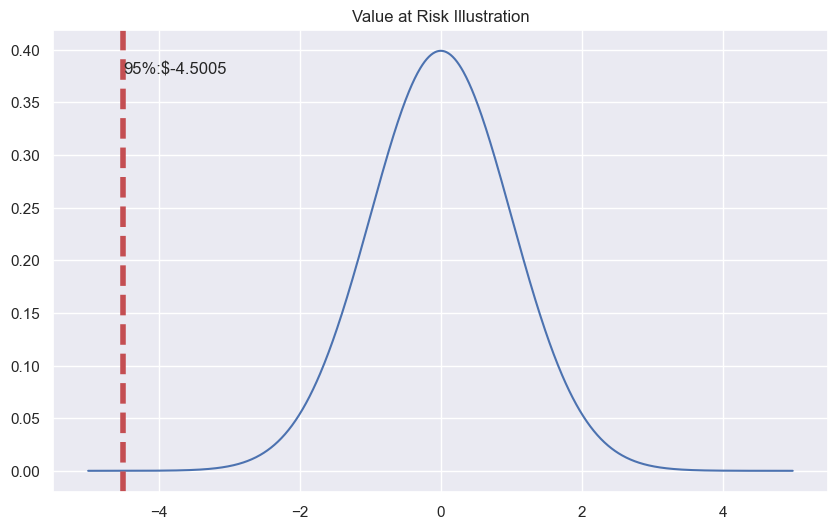

In [2]:
mean=0
std_dev=1
x=np.arange(-5,5,0.01)
y=norm.pdf(x,mean,std_dev)
pdf=plt.plot(x,y)
min_ylim, max_ylim=plt.ylim()
plt.text(np.percentile(x,5), max_ylim*0.9, '95%:${:.4f}'.format(np.percentile(x,5)))
plt.axvline(np.percentile(x,5), color='r', linestyle='dashed', linewidth=4)
plt.title('Value at Risk Illustration')
plt.show()

In [3]:
# 주가 수익률은 두터운 꼬리 + 비대칭 -> 정규분포를 따르지 않음: 정규분포보다 첨도가 더 높음
# 분산-공분산 방법: 두터운 꼬리를 포착할 수 없음 -> 위기 기간에 발생할 가능성이 있는 극단적읜 음의 수익을 추정할 수 없음

In [4]:
'''
유료화 Issue..
def getDailyData(symbol):
    # Alpha Vantage에서 데이터를 추출하는 데 사용할 매개변수 식별
    parameters={'function': 'TIME_SERIES_DAILY_ADJUSTED',
                'symbol': symbol,
                'outputsize':'full',
                'datatype':'csv',
                'apikey': '6PK1E431KRTEK355'}
    # Alpha Vantage 웹사이트에 요청
    # 파이썬에서 웹 브라우저처럼 인터넷 주소(URL)로 접속하여 데이터를 받아오는 역할
    response=requests.get('https://www.alphavantage.co/query',
                          params=parameters)
    print("서버 응답 내용:", response.text[:200])
    # request로 받아온 데이터는 단순한 String임
    # 텍스트 형식의 응답 파일 열기
    # 긴 문자열을 파일처럼 포장해줌: 메모리에 있는 문자열을 하드디스크에 저장된 파일인 것처럼 다룸
    csvText=StringIO(response.text)
    # read_csv: 파일을 읽어오도록 설계되어 있음
    data=pd.read_csv(csvText, index_col='timestamp')
    return data
    '''

'\n유료화 Issue..\ndef getDailyData(symbol):\n    # Alpha Vantage에서 데이터를 추출하는 데 사용할 매개변수 식별\n    parameters={\'function\': \'TIME_SERIES_DAILY_ADJUSTED\',\n                \'symbol\': symbol,\n                \'outputsize\':\'full\',\n                \'datatype\':\'csv\',\n                \'apikey\': \'6PK1E431KRTEK355\'}\n    # Alpha Vantage 웹사이트에 요청\n    # 파이썬에서 웹 브라우저처럼 인터넷 주소(URL)로 접속하여 데이터를 받아오는 역할\n    response=requests.get(\'https://www.alphavantage.co/query\',\n                          params=parameters)\n    print("서버 응답 내용:", response.text[:200])\n    # request로 받아온 데이터는 단순한 String임\n    # 텍스트 형식의 응답 파일 열기\n    # 긴 문자열을 파일처럼 포장해줌: 메모리에 있는 문자열을 하드디스크에 저장된 파일인 것처럼 다룸\n    csvText=StringIO(response.text)\n    # read_csv: 파일을 읽어오도록 설계되어 있음\n    data=pd.read_csv(csvText, index_col=\'timestamp\')\n    return data\n    '

In [5]:
def getDailyData(symbol):
    ticker=yf.Ticker(symbol)
    data=ticker.history(period='max',auto_adjust=True)
    return data

In [6]:
symbols=['IBM','MSFT','INTC']
stock3=[]
for symbol in symbols:
    stock3.append(getDailyData(symbol)['Close']['2020-01-01':'2020-12-31'])
stocks=pd.DataFrame(stock3).T

In [7]:
stocks.columns=symbols

In [8]:
stocks_returns=(np.log(stocks)-np.log(stocks.shift(1))).dropna()
# 인덱스 그대로 & 값만 한 칸씪 아래로

In [9]:
stocks_returns_mean=stocks_returns.mean()
weights=np.random.random(len(stocks_returns.columns))
weights /= np.sum(weights)
cov_var=stocks_returns.cov()
port_std=np.sqrt(weights.T.dot(cov_var).dot(weights))

In [10]:
individual_stds=np.sqrt(np.diag(cov_var))

In [11]:
initial_investment=1e6
conf_level=0.95

In [12]:
def VaR_parametric(initial_investment, conf_level):
    VaR_param=[]
    #ppf: 하위 몇 %가 되려면 z가 몇?
    alpha_p=norm.ppf(1-conf_level, stocks_returns_mean.dot(weights),port_std) # 퍼센트 포인트 함수 -> 특정 값에 대한 Z-점수 계산
    for i, j in zip(stocks.columns, range(len(stocks.columns))):
        alpha=norm.ppf(1-conf_level, stocks_returns_mean[j],individual_stds[j])
        VaR_param.append(initial_investment-initial_investment*(1+alpha))
        print('Parametric VaR result for {} is {}'.format(i, VaR_param[j]))
    print('--'*25)
    return VaR_param

In [13]:
VaR_param=VaR_parametric(initial_investment, conf_level)
VaR_param

Parametric VaR result for IBM is 42731.92941290955
Parametric VaR result for MSFT is 44305.07984816318
Parametric VaR result for INTC is 56689.32007223158
--------------------------------------------------


[np.float64(42731.92941290955),
 np.float64(44305.07984816318),
 np.float64(56689.32007223158)]

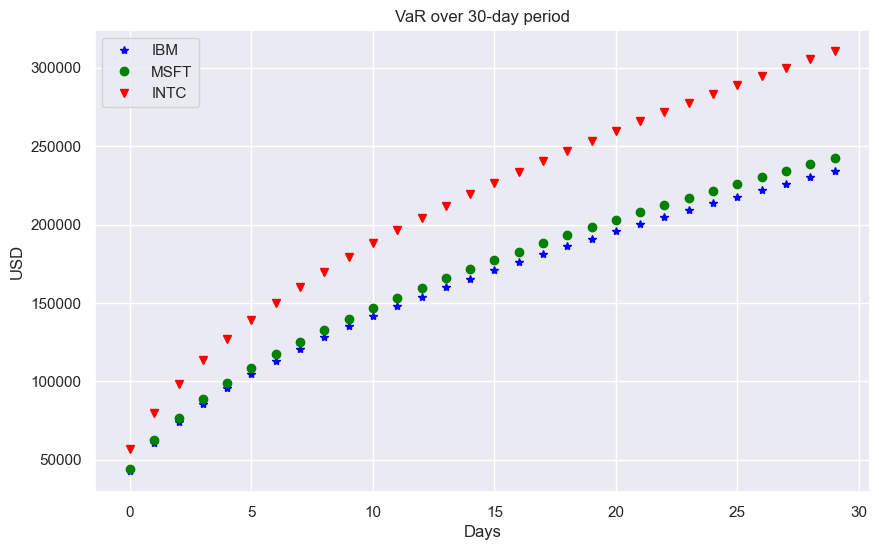

In [14]:
# 보유 기간: 포트폴리오 청산 중 가장 긴 기간임
# in 보고 목적, 30일이 더 적합함
var_horizon=[]
time_horizon=30
for j in range(len(stocks_returns.columns)):
    for i in range(1, time_horizon+1):
        var_horizon.append(VaR_param[j]*np.sqrt(i))
plt.plot(var_horizon[:time_horizon], 'o', c='blue',marker='*',label='IBM')
plt.plot(var_horizon[time_horizon:time_horizon+30], 'o', c='green',marker='o',label='MSFT')
plt.plot(var_horizon[time_horizon+30:time_horizon+60], 'o', c='red',marker='v',label='INTC')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('VaR over 30-day period')
plt.legend()
plt.show()

(\*) VaR: 보유 기간에 따라 $\sqrt{t}$에 비례해 커짐
(*) 분산-공분산 방법 단점:
- 관찰이 정규분포
- 비선형 구조 잘 작동 x
- 공분산 행렬 계산 필요

1. (2) 과거 시뮬레이션 방법
- 정규분포와 같은 가정은 부정확한 추정의 원인임
- 과거 시뮬레이션 VaR: 경험적 방법 ~ 모수적 접근 방식 대신 Z 테이블과 동치인 백분위수 찾기
- Step:
$\\$(i) 포트폴리오(or 개별 자산)의 자산 수익률 획득
$\\$(ii) 신뢰구간을 기반으로 해당 수익 백분위수 찾기
$\\$(iii) 해당 백분위수에 초기 투자 곱

In [15]:
def VaR_historical(initial_investment, conf_level):
    Hist_percentile95=[]
    for i,j in zip(stocks_returns.columns, range(len(stocks_returns.columns))):
        Hist_percentile95.append(np.percentile(stocks_returns.loc[:,i],5))
        print("Based on historical values 95% of {}'s return is {:.4f}".format(i, Hist_percentile95[j]))
        VaR_historical=(initial_investment-initial_investment*(1+Hist_percentile95[j]))
        print('Historical VaR result for {} is {:.2f}'.format(i, VaR_historical))
        print('--'*35)

In [16]:
VaR_historical(initial_investment,conf_level)

Based on historical values 95% of IBM's return is -0.0371
Historical VaR result for IBM is 37081.75
----------------------------------------------------------------------
Based on historical values 95% of MSFT's return is -0.0426
Historical VaR result for MSFT is 42583.86
----------------------------------------------------------------------
Based on historical values 95% of INTC's return is -0.0425
Historical VaR result for INTC is 42485.42
----------------------------------------------------------------------


(\*) 역사적 가격 변동이 유사한 패턴 ~ 구조적 변화(Structural Break)가 없다고 암시적으로 가정함
(\*) 장점:
- 분포 가정 없음 / 비선형 구조 잘 작동 / 계산 쉬움
(\*) 단점:
- 많은 샘플 필요 / 높은 연산 성능 필요

1. (3) 몬테 카를로 시뮬레이션 VaR
- 몬테 카를로: 닫힌 형식의 해가 없는 경우 추정을 수행하는 데 사용되는 컴퓨터화된 수학적 방법 ~ 수치 근사를 위한 매우 효율적인 도구
- 주어진 분포에서 반복되는 무작위 표본에 의존
- 역사적 시뮬레이션 VaR과 유사 but 역사적 관찰을 사용하지는 않음 -> 주어진 분포에서 무작위 샘플 생성
- 가능한 결과 ~ 확률 간의 연결을 제공해 의사결정자를 도움
$\\ X_1,\ X_2,\ ...,\ X_n$: independent, identical dist. Random Variable
$\\ f(x)$: 실수값 함수
$\\ E(f(X))\approx \frac{1}{N}\sum^N_if(X_i)$: 무작위 샘플 생성 후 평균 계산
- Step:
$\\$(i) 도메인 정의
$\\$(ii) 난수 생성
$\\$(iii) 결과 반복 및 집계

In [17]:
# [-1,1] 도메인 정의 & 난수 생성
x=np.random.uniform(-1,1,100)
y=np.random.uniform(-1,1,100)

In [18]:
sample=100
def pi_calc(x,y):
    point_inside_circle=0
    for i in range(sample):
        if np.sqrt(x[i]**2+y[i]**2) <= 1: # 반지름이 1인 원 안에 점이 있는지 확인
            point_inside_circle+=1
    print('pi value is {}'.format(4*point_inside_circle/sample))

In [19]:
pi_calc(x,y)

pi value is 3.16


In [20]:
x=np.random.uniform(-1,1,1000000)
y=np.random.uniform(-1,1,1000000)

In [ ]:
sample=1000000
def pi_calc(x,y):
    point_inside_circle=0
    for i in range(sample):
        if np.sqrt(x[i]**2+y[i]**2)<1:
            point_inside_circle+=1
    print('pi value is {:.2f}'.format(4*point_inside_circle/sample)) # 원 안에/정사각형 안에 비율 -> 파이 추정

In [22]:
pi_calc(x,y)

pi value is 3.15


In [ ]:
sim_data=pd.DataFrame([])
num_reps=1000
n=100
for i in range(len(stocks.columns)):
    mean=np.random.randn(n).mean() # 무작위 n개 뽑아서 평균 계산
    std=np.random.randn(n).std() # 무작위 n개 뽑아서 표준편차 계산
    temp=pd.DataFrame(np.random.normal(mean, std, num_reps)) 
    sim_data=pd.concat([sim_data, temp], axis=1)
sim_data.columns=['Simulation 1','Simulation 2','Simulation 3']

In [24]:
def MC_VaR(initial_investment, conf_level):
    MC_percentile95=[]
    for i, j in zip(sim_data.columns, range(len(sim_data.columns))):
        MC_percentile95.append(np.percentile(sim_data.loc[:,i],5)) # 하위 5%
        print("Based on simulation 95% of {}'s return is {:.4f}".format(i, MC_percentile95[j]))
        VaR_MC=(initial_investment-initial_investment*(1+MC_percentile95[j]))
        print("Simulation VaR result for {} is {:.2f}".format(i, VaR_MC))
        print('--'*35)

In [25]:
MC_VaR(initial_investment, conf_level)

Based on simulation 95% of Simulation 1's return is -1.4493
Simulation VaR result for Simulation 1 is 1449260.24
----------------------------------------------------------------------
Based on simulation 95% of Simulation 2's return is -1.9290
Simulation VaR result for Simulation 2 is 1929001.64
----------------------------------------------------------------------
Based on simulation 95% of Simulation 3's return is -1.8879
Simulation VaR result for Simulation 3 is 1887896.67
----------------------------------------------------------------------


(\*) 잡음 제거
- Generally, 시장에는 잡음 & 신호라는 두 가지 유형의 정보가 있음
- 잡음: 무작위 정보만 생성 -> 거래 동기: 무작위 행동
- 신호: 투자자가 돈을 벌 수 있는 귀중한 정보를 제공 -> 신호를 평가할 수 있음: 합리적 거래자
- 잡음과 신호를 구별할 수 없는 투자자는 이익을 얻지 못하거나 위험을 적절하게 평가하지 못함

(\*) 마르첸코-파스퇴르정리 -> 공분산 행렬의 고윳값을 사용해 잡음에서 신호 추출 가능
$\\ Ax=\lambda x,\ x \in \mathbb{R}^n!=0,\ \lambda \in \mathbb{R}$: A의 고윳값 & $x$: A의 고유 벡터
$\\$In 재정적 맥락, 고유 벡터: 공분산 행렬의 분산, 고윳값: 고유 벡터의 크기
- 가장 큰 고유 벡터: 가장 큰 분산
- 데이터의 잡음으로 인해 일부 고윳값은 무작위로 간주될 수 있음 & 이러한 고윳값을 감지하고 필터링해 신호만 유지하는 것이 좋음

In [32]:
def mp_pdf(sigma2, q, obs):
    # 최소/최대 기대 고윳값 계산
    lambda_plus=sigma2*(1+q**0.5)**2
    lambda_minus=sigma2*(1-q**0.5)**2
    l=np.linspace(lambda_minus, lambda_plus, obs)
    pdf_mp=1/(2*np.pi*sigma2*q*l)*np.sqrt((lambda_plus-l)*(l-lambda_minus))
    pdf_mp=pd.Series(pdf_mp,index=l)
    return pdf_mp

In [ ]:
from sklearn.neighbors import KernelDensity
def kde_fit(bandwidth, obs, x=None):
    # 히스토그램을 메끄럽게 만드는 과정 ~ 데이터의 분포 모양을 부드러운 곡선으로 그려줌
    kde=KernelDensity(bandwidth=bandwidth, kernel='gaussian')
    if len(obs.shape)==1:
        kde_fit=kde.fit(np.array(obs).reshape(-1,1)) # 커널 밀도를 관측값에 적합화
    if x is None:
        x=np.unique(obs).reshape(-1,1) # -1: 자동, 1: 열 한 개
    if len(x.shape)==1:
        x=x.reshape(-1,1)
    logprob=kde_fit.score_samples(x) # 관찰에 대한 로그 밀도 모델 평가
    pdf_kde=pd.Series(np.exp(logprob), index=x.flatten())
    return pdf_kde

In [29]:
# 무작위 표본 생성
corr_mat=np.random.normal(size=(10000,1000))
corr_coef=np.corrcoef(corr_mat, rowvar=0) # 공분산 -> 상관 행렬로 변환
sigma2=1
obs=corr_mat.shape[0]
q=corr_mat.shape[0]/corr_mat.shape[1]

In [ ]:
def plotting(corr_coef, q):
    ev, _=np.linalg.eigh(corr_coef) # 상관 행렬의 고윳값 계산
    idx=ev.argsort()[::-1] # 데이터 크기순 정렬 후 인덱스 알려줌
    eigen_val=np.diagflat(ev[idx]) # numpy -> 대각 행렬로 바 꾸기
    pdf_mp=mp_pdf(1., q=corr_mat.shape[1]/corr_mat.shape[0], obs=1000) # 마르첸코-파스퇴르 분포의 확률 밀도함수 추정 위해 호출
    kde_pdf=kde_fit(bandwidth=0.01, obs=np.diag(eigen_val)) # 데이터에 커널 분포 적합화
    ax=pdf_mp.plot(title='Marchenko-Pastur Theorem', label='M-P', style='r--')
    kde_pdf.plot(label='Empirical Density', style='o--', alpha=0.3)
    ax.set(xlabel='Eigenvalue', ylabel='Frequency')
    ax.legend(loc='upper right')
    plt.show()
    return plt


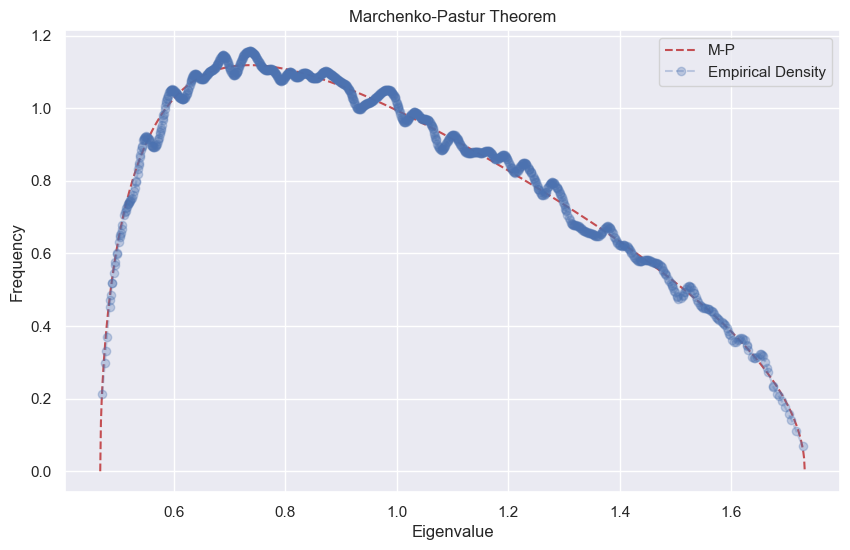

<module 'matplotlib.pyplot' from 'c:\\Users\\82103\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [37]:
plotting(corr_coef, q)

(\*) 공분산 행렬의 잡음 제거: 데이터에서 불필요한 정보(잡음)를 제거하는 것뿐 -> 시장의 신호를 활용해 중요한 사건에만 주의 집중 가능
- Step of 공분산 행렬의 잡음 제거
1. 상관 행렬을 기반으로 고윳값 & 고유 벡터 계산
2. 커널 밀도 추정 -> 특정 고윳값에 대한 고유 벡터 찾기
3. 커널 밀도 추정에 마르첸코-파스퇴르 분포 적합화
4. 마르첸코-파스퇴르 -> 최대 이론적 고윳값 찾기
5. 이론값보다 튼 고윳값의 평균 계산
6. new 고윳값 & 고유 벡터 사용해 잡음 제거 상관관계 계산
7. 새로운 상관 행렬로 잡음 제거 공분산 행렬 계산